# Load Data From Kaggle
Dataset from outside:
https://www.kaggle.com/muhammadkhalid/sign-language-for-numbers

https://www.kaggle.com/ahmedkhanak1995/sign-language-gesture-images-dataset 

https://drive.google.com/drive/folders/1veEF-oewY4_qp_sjFi6pjZoRMRyhaBv_?usp=sharing
From https://lttm.dei.unipd.it/downloads/gesture/

Our own Dataset:
https://www.kaggle.com/nabilahnran/number-hand-gesture

Install Kaggle to load data from there

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"galuhputraw","key":"c2e98abe0a4f3c0b8179e4f893f7dadb"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-05-15 08:36:45           5367  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           2955  
mathurinache/twitter-edge-nodes                             Twitter Edge Nodes                                342MB  2021-03-08 06:43:04            347  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           1797  
imsparsh/musicnet-dataset                                   MusicNet Dataset

In [3]:
!kaggle datasets download -d muhammadkhalid/sign-language-for-numbers
!kaggle datasets download -d ahmedkhanak1995/sign-language-gesture-images-dataset
!kaggle datasets download -d nabilahnran/number-hand-gesture

 69% 33.0M/48.1M [00:00<00:00, 65.3MB/s]
100% 48.1M/48.1M [00:00<00:00, 107MB/s] 
 98% 186M/191M [00:01<00:00, 122MB/s]
100% 191M/191M [00:01<00:00, 105MB/s]
100% 1.12G/1.12G [00:14<00:00, 66.9MB/s]
100% 1.12G/1.12G [00:14<00:00, 82.4MB/s]


Extract ZIP datas from kaggle that have been loaded

In [4]:
import zipfile
handgesture1 = 'sign-language-for-numbers.zip'
handgesture2 = 'sign-language-gesture-images-dataset.zip'
handgesture3 = 'number-hand-gesture.zip'
zip_ref = zipfile.ZipFile(handgesture1, 'r')
zip_ref.extractall('/tmp/sign-language-for-numbers')
zip_ref = zipfile.ZipFile(handgesture2, 'r')
zip_ref.extractall('/tmp/sign-language-gesture-images-dataset')
zip_ref = zipfile.ZipFile(handgesture3, 'r')
zip_ref.extractall('/tmp/number-hand-gesture')
zip_ref.close()

Load data from Gdrive

In [5]:
# from google.colab import drive
# drive.mount("/content/drive")

In [6]:
# !ls "/content/drive/Shared drives/Danbam-tech/Dataset Hand Gesture/Dataset Tambahan"

In [7]:
!ls

kaggle.json		 sign-language-for-numbers.zip
number-hand-gesture.zip  sign-language-gesture-images-dataset.zip
sample_data


In [9]:
import os
num= ['0','1','2','3','4','5', '6','7','8','9']
def countImage(pathFolder):
  totalval1=0
  for a in os.listdir(pathFolder):
    if a in num:
      total=len(os.listdir(os.path.join(pathFolder, a)))
      totalval1=totalval1+total
  print("total image in folder " + pathFolder+ " : " + str(totalval1))

print("this number of image below just contain hand number image")
# countImage('/tmp/number-hand-gesture/Dataset Hand Gesture')
countImage('/tmp/sign-language-for-numbers/Sign Language for Numbers')
countImage('/tmp/sign-language-gesture-images-dataset/Gesture Image Pre-Processed Data')
# countImage('/content/drive/Shared drives/Danbam-tech/Dataset Hand Gesture/Dataset Tambahan')

this number of image below just contain hand number image
total image in folder /tmp/sign-language-for-numbers/Sign Language for Numbers : 15000
total image in folder /tmp/sign-language-gesture-images-dataset/Gesture Image Pre-Processed Data : 15000


Make destination directory, divided into training and validation directory

In [10]:
for i in num:
  data= os.path.join("/tmp/datas/training", i)
  os.makedirs(data)
for i in num:
  data= os.path.join("/tmp/datas/validation", i)
  os.makedirs(data)

Copy the datas into the destination directory

In [11]:
import random
print(data)
import shutil
import os
def joinImage(path_folder, split):
  for i in os.listdir(path_folder):
    if i in num:
      p=os.path.join(path_folder,i)
      tmp=os.listdir(p)
      tmpp = random.sample(tmp, len(tmp))
      if split=='training':
        for a in tmpp:
          p1=os.path.join(p, a)
          des_path=os.path.join('/tmp/datas/training', i)
          shutil.copy2(p1, des_path)
      else:
        length=int(len(os.listdir(p))/10)
        for a in tmpp[length:]:
          p1=os.path.join(p, a)
          des_path=os.path.join('/tmp/datas/training', i)
          shutil.copy2(p1, des_path)
        for a in tmpp[:length]:
          p1=os.path.join(p, a)
          des_path=os.path.join('/tmp/datas/validation', i)
          shutil.copy2(p1, des_path)
          


#joinImage('/tmp/number-hand-gesture/Dataset Hand Gesture', 'validation')
joinImage('/tmp/sign-language-for-numbers/Sign Language for Numbers', 'validation')
joinImage('/tmp/sign-language-gesture-images-dataset/Gesture Image Pre-Processed Data','validation')
#joinImage('/content/drive/Shared drives/Danbam-tech/Dataset Hand Gesture/Dataset Tambahan', 'validation')

/tmp/datas/validation/9


In [12]:
for t in num:
  if t in num:
    hg1=os.listdir(os.path.join('/tmp/number-hand-gesture/Dataset Hand Gesture/', t))
    hg2=os.listdir(os.path.join('/tmp/sign-language-for-numbers/Sign Language for Numbers', t))
    hg3=os.listdir(os.path.join('/tmp/sign-language-gesture-images-dataset/Gesture Image Pre-Processed Data', t))
    #hg4=os.listdir(os.path.join('/content/drive/Shared drives/Danbam-tech/Dataset Hand Gesture/Dataset Tambahan', t))
    print("hand gesture dir training" + t)
    print("in previous folder: "+ str(len(hg2+hg3)))
    pth1=os.path.join('/tmp/datas/training', t)
    cba=os.listdir(pth1)
    print("in current folder:" +str(len(cba)))
    print('\n')

    print("hand gesture dir validation" + t)
    print("in previous folder: "+ str(len(hg1)))
    pth1=os.path.join('/tmp/datas/validation', t)
    cba=os.listdir(pth1)
    print("in current folder:" +str(len(cba)))
    print('\n')




hand gesture dir training0
in previous folder: 3000
in current folder:2700


hand gesture dir validation0
in previous folder: 101
in current folder:300


hand gesture dir training1
in previous folder: 3000
in current folder:2700


hand gesture dir validation1
in previous folder: 111
in current folder:300


hand gesture dir training2
in previous folder: 3000
in current folder:2700


hand gesture dir validation2
in previous folder: 103
in current folder:300


hand gesture dir training3
in previous folder: 3000
in current folder:2700


hand gesture dir validation3
in previous folder: 81
in current folder:300


hand gesture dir training4
in previous folder: 3000
in current folder:2700


hand gesture dir validation4
in previous folder: 95
in current folder:300


hand gesture dir training5
in previous folder: 3000
in current folder:2700


hand gesture dir validation5
in previous folder: 94
in current folder:300


hand gesture dir training6
in previous folder: 3000
in current folder:2700


ha

In [13]:
totaltrain=0
totalval=0
for a in os.listdir('/tmp/datas/training'):
  total=len(os.listdir(os.path.join('/tmp/datas/training', a)))
  totaltrain=totaltrain+total
for a in os.listdir('/tmp/datas/validation'):
  total=len(os.listdir(os.path.join('/tmp/datas/validation', a)))
  totalval=totalval+total
print("total training data: "+str(totaltrain))
print("total validation data: "+str(totalval))

total training data: 27000
total validation data: 3000


In [14]:
import tensorflow as tf
print(tf.__version__)

2.4.1


Build the model

In [15]:
model= tf.keras.Sequential([
                            tf.keras.layers.Conv2D(16, (3,3), input_shape=(50,50,1), activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128, activation='relu'),
                            tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3872)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               495744    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

Processing data with Image Data Generator

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
training_dir = '/tmp/datas/training'
validation_dir= '/tmp/datas/validation'

#Coba tambahin zoom_range - > image augment
train_datagen= ImageDataGenerator(rescale=1/255)
train_generator=train_datagen.flow_from_directory(
    training_dir,
    target_size=(50,50),
    batch_size=10,
    class_mode='categorical',
    color_mode= 'grayscale'
)

validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (50,50),
    batch_size = 10,
    class_mode = 'categorical',
    color_mode='grayscale'
)

Found 27000 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.


Training Data

In [18]:
history = model.fit(train_generator, epochs=5, validation_data=validation_generator)

Epoch 1/5
2700/2700 [==============================] - 70s 26ms/step - loss: 0.8901 - accuracy: 0.7024 - val_loss: 0.2512 - val_accuracy: 0.9167
Epoch 2/5
2700/2700 [==============================] - 71s 26ms/step - loss: 0.1927 - accuracy: 0.9409 - val_loss: 0.1615 - val_accuracy: 0.9480
Epoch 3/5
2700/2700 [==============================] - 71s 26ms/step - loss: 0.0873 - accuracy: 0.9728 - val_loss: 0.1136 - val_accuracy: 0.9653
Epoch 4/5
2700/2700 [==============================] - 72s 27ms/step - loss: 0.0416 - accuracy: 0.9873 - val_loss: 0.1271 - val_accuracy: 0.9650
Epoch 5/5
2700/2700 [==============================] - 74s 27ms/step - loss: 0.0316 - accuracy: 0.9914 - val_loss: 0.1266 - val_accuracy: 0.9657


Plot Training and Validation Result

Text(0.5, 1.0, 'Training and validation loss')

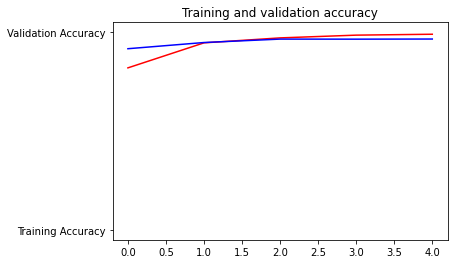

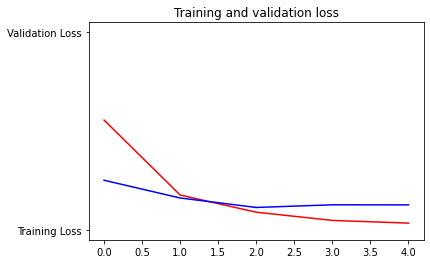

In [19]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

Test the model

In [27]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from PIL import ImageOps

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(50,50))
  img=ImageOps.grayscale(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0][0]==1:
    print(fn + " is zero")
  elif classes[0][1]==1:
    print(fn + " is one")
  elif classes[0][2]==1:
    print(fn + " is two")
  elif classes[0][3]==1:
    print(fn + " is three")
  elif classes[0][4]==1:
    print(fn + " is four")
  elif classes[0][5]==1:
    print(fn + " is five")
  elif classes[0][6]==1:
    print(fn + " is six")
  elif classes[0][7]==1:
    print(fn + " is seven")
  elif classes[0][8]==1:
    print(fn + " is eight")
  else:
    print(fn + " is nine")

Saving Screenshot 2021-05-18 134220.png to Screenshot 2021-05-18 134220 (1).png
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Screenshot 2021-05-18 134220.png is zero
